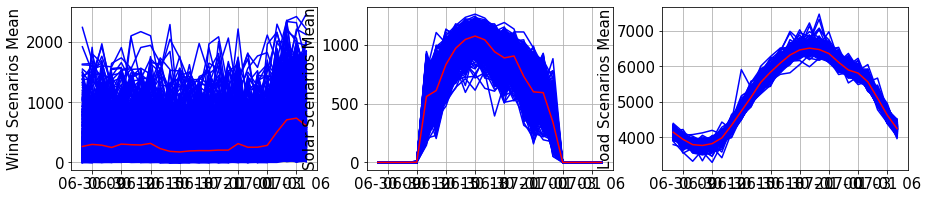

In [1]:
import bz2
import dill as pickle
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import mean
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
out_file = "scens_2020-06-30.p.gz"
with bz2.BZ2File(out_file, "rb") as f:
    scenarios = pickle.load(f)
    #print(day_scens[])
df = pd.DataFrame([scenarios])
#print(dict.keys(scenarios))
WindScenarios=scenarios['Wind']['309_WIND_1']+scenarios['Wind']['303_WIND_1']+scenarios['Wind']['122_WIND_1']+scenarios['Wind']['317_WIND_1']
#print(WindScenarios)
WindScenarios.to_csv('WindScenariosAggregated.csv')
SolarAsset=['320_PV_1', '314_PV_1', '314_PV_2', '313_PV_1', '314_PV_3', '314_PV_4', '313_PV_2', '310_PV_1', '324_PV_1', '312_PV_1', '310_PV_2', '324_PV_2', '324_PV_3', '113_PV_1', '319_PV_1', '215_PV_1', '102_PV_1', '101_PV_1', '102_PV_2', '104_PV_1', '101_PV_2', '101_PV_3', '101_PV_4', '103_PV_1', '119_PV_1']
#print(len(SolarAsset))
SolarScenarios=scenarios['Solar'][SolarAsset[0]]
for i in range(1,25):
    SolarScenariosNew=scenarios['Solar'][SolarAsset[i]]
    SolarScenarios=SolarScenarios+SolarScenariosNew
    SolarScenariosNew.to_csv('SolarScenario'+str(i)+'.csv')
#print(SolarScenarios)
SolarScenarios.to_csv('SolarScenariosAggregated.csv')
LoadScenarios=scenarios['Load']['1']+scenarios['Load']['2']+scenarios['Load']['3']

WindMean = mean(WindScenarios)
SolarMean = mean(SolarScenarios)
LoadMean = mean(LoadScenarios)

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Wind Scenarios Mean",fontsize=15)
plt.plot(WindScenarios.T,'b')
plt.plot(WindMean.T,'r')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Solar Scenarios Mean",fontsize=15)
plt.plot(SolarScenarios.T,'b')
plt.plot(SolarMean.T,'r')
plt.show
plt.grid()
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.set_ylabel("Load Scenarios Mean",fontsize=15)
plt.plot(LoadScenarios.T,'b')
plt.plot(LoadMean.T,'r')
plt.show
plt.grid()
ax.tick_params(labelsize=15)


Process RTS sample scenarios to understand input-output relationship between RTS scenarios and Vatic outputs:
(i) total daily system costs; (ii) lost load; (iii) renewable curtailment.

<function matplotlib.pyplot.show(close=None, block=None)>

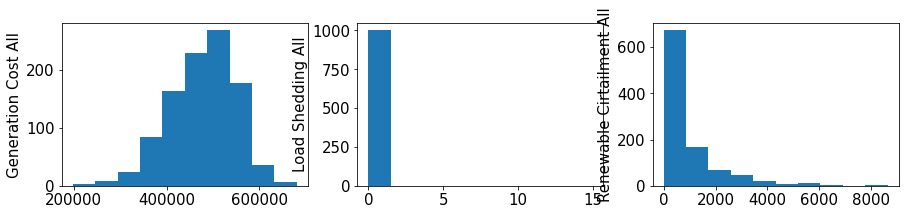

In [2]:
import bz2
import dill as pickle
import pandas as pd
import csv
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
out_file = "daily_summaryJune30.p.gz"
with bz2.BZ2File(out_file, "rb") as f:
    day_scens = pickle.load(f)
    #print(day_scens[])
df = pd.DataFrame([day_scens])
#print(dict.keys(day_scens))
LoadSheddingAll=day_scens[()]['Load shedding']
#print(LoadShedding)
GenerationCostAll=day_scens[()]['Generation costs']
#print(GenerationCost)
RenewableCurtailmentAll=day_scens[()]['Renewables curtailment']
#print(RenewablesCurtailment)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
ax.set_ylabel("Generation Cost All",fontsize=15)
ax.hist(GenerationCostAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,2)
ax.set_ylabel("Load Shedding All",fontsize=15)
ax.hist(LoadSheddingAll)
ax.tick_params(labelsize=15)

ax = fig.add_subplot(1,3,3)
ax.hist(RenewableCurtailmentAll)
ax.set_ylabel("Renewable Cirtailment All",fontsize=15)
ax.tick_params(labelsize=15)
plt.show

[9, 75, 116, 175, 227, 292, 467, 510, 538, 583, 606, 629, 653, 763, 778, 904]


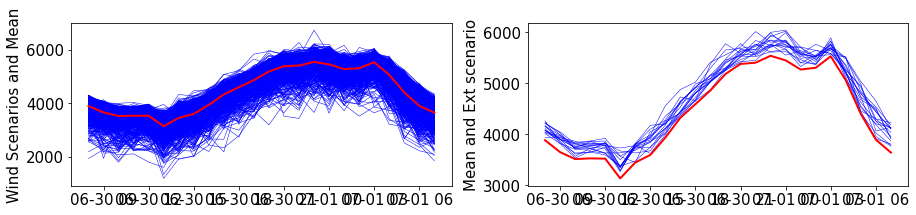

In [3]:
DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
MeanDiff=mean(DifferenceLoadWindSolar)
import matplotlib.pyplot as plt
import numpy as np
import math
Thresold=MeanDiff
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,2,1)
ax.tick_params(labelsize=15)
ax.set_ylabel("Wind Scenarios and Mean",fontsize=15)
plt.plot(DifferenceLoadWindSolar.T,'b', label='Difference', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

index=[]
time=WindScenarios.keys()
ax = fig.add_subplot(1,2,2)
ax.tick_params(labelsize=15)
ax.set_ylabel("Mean and Ext scenario",fontsize=15)
for k in range(0,1000):
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    check=(ScenArray-Thresold)
    CheckArray=[]
    for t in range(0,24):
        CheckArray.append(check[time[t]])
    if(all(x > 0 for x in CheckArray)):
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
        index.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print(index)
plt.show()

We consider all load, solar and wind to be stochastic and in that case we try to understand the relationship between the scenarios and the vatic output

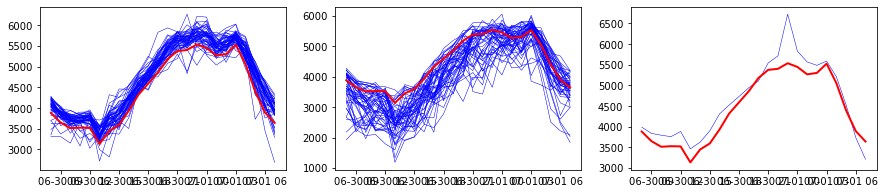

In [4]:
GenCostSortedAll=[]
LoadShedSortedAll=[]
CurtailSortedAll=[]
for i in range(0,1000):
    a=GenerationCostAll[i]
    b=RenewableCurtailmentAll[i]
    GenCostSortedAll.append(a)
    CurtailSortedAll.append(b)
#GenCostSorted.sort(reverse=True)
#print(GenCostSorted)

import numpy
sort_indexGenCostAll = numpy.argsort(GenCostSortedAll)
#print("Scenario indices that causes highest 5% generation cost:", sort_indexGenCostAll[950:1000])
sort_index_curAll = numpy.argsort(CurtailSortedAll)
#print("Scenario indices that causes highest 5% renewable curtailment:", sort_index_curAll[950:1000])
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ax = fig.add_subplot(1,3,2)
for k in sort_index_curAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

LoadShedSortedAll=[]
for i in range(0,1000):
    a=LoadSheddingAll[i]
    LoadShedSortedAll.append(a)
LoadShedSortedAll=np.nonzero(LoadShedSortedAll)

ax = fig.add_subplot(1,3,3)
for k in LoadShedSortedAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

The scenario causing the high generation cost, for them the integration of energy generation over 24 hrs are high and above the thresold value.

106011.84560320002


50

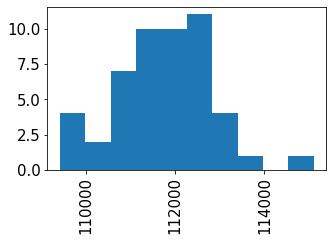

In [5]:
ThresoldCompArray=[]
for i in range(0,24):
    ThresoldComp=Thresold[time[i]]
    ThresoldCompArray.append(ThresoldComp)
#print(ThresoldCompArray)
import numpy as np  
SumThresold=np.sum(ThresoldCompArray)
print(SumThresold)
IntegrationScen=[]
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    IntegrationScen.append(np.sum(ScenArray))
#print(IntegrationScen)
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
ax.hist(IntegrationScen, bins=10)
plt.xticks(rotation=90)
sum(i > SumThresold for i in IntegrationScen)

 We consider only those scenario which has a rapid jump in energy generation from 16th hour to 17th hour. This rapid jump in energy causes the higher generation cost. The scenarios that causes the highest 5% generation cost does not have any connection with the Load shedding or the renewable curtailment though.

We consider those scenarios whose integration value is high (higher than some thresold value)

Text(0, 0.5, 'Generation cost')

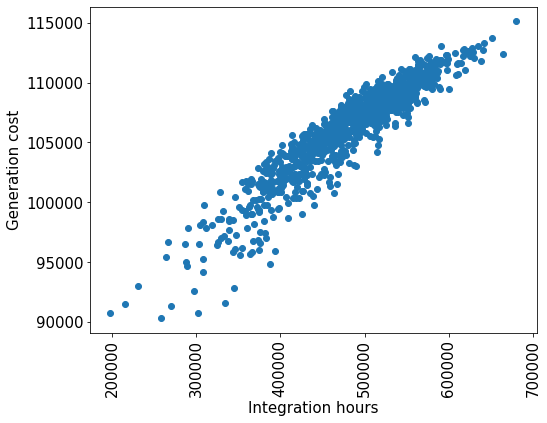

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(8,6))
ax.tick_params(labelsize=15)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    IntegrationScen.append(a)
    ExtScenIdx.append(k)
    #plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
#plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
#print(IntegrationScen)
NumExtScen=sum(i > SumThresold for i in IntegrationScen)
#print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
plt.scatter(HighGenCost,IntegrationScen)
#ax.hist(GenerationCostAll)
#ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)
ax.set_xlabel("Integration hours",fontsize=15)
ax.set_ylabel("Generation cost",fontsize=15)

[9, 43, 75, 101, 116, 137, 175, 208, 219, 243, 274, 275, 290, 331, 359, 431, 510, 511, 516, 554, 583, 608, 629, 642, 653, 778, 805, 855, 876, 877, 904, 923, 937, 960, 967, 976]


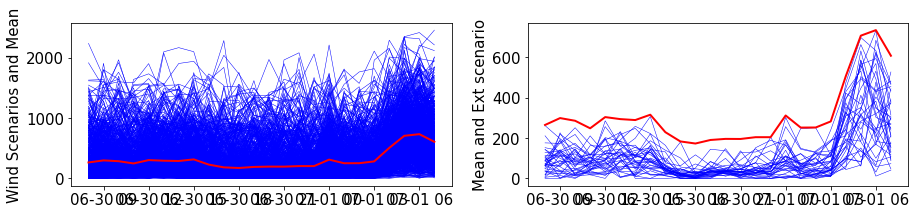

In [7]:
DifferenceLoadWindSolar=WindScenarios
MeanDiff=mean(DifferenceLoadWindSolar)
import matplotlib.pyplot as plt
import numpy as np
import math
Thresold=MeanDiff
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,2,1)
ax.tick_params(labelsize=15)
ax.set_ylabel("Wind Scenarios and Mean",fontsize=15)
plt.plot(DifferenceLoadWindSolar.T,'b', label='Difference', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

index=[]
time=WindScenarios.keys()
ax = fig.add_subplot(1,2,2)
ax.tick_params(labelsize=15)
ax.set_ylabel("Mean and Ext scenario",fontsize=15)
for k in range(0,1000):
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    check=(ScenArray-Thresold)
    CheckArray=[]
    for t in range(0,24):
        CheckArray.append(check[time[t]])
    if(all(x < 0 for x in CheckArray)):
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
        index.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print(index)
plt.show()

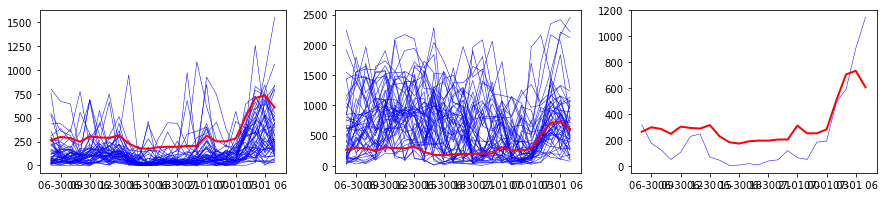

In [8]:
GenCostSortedAll=[]
LoadShedSortedAll=[]
CurtailSortedAll=[]
for i in range(0,1000):
    a=GenerationCostAll[i]
    b=RenewableCurtailmentAll[i]
    GenCostSortedAll.append(a)
    CurtailSortedAll.append(b)
#GenCostSorted.sort(reverse=True)
#print(GenCostSorted)

import numpy
sort_indexGenCostAll = numpy.argsort(GenCostSortedAll)
#print("Scenario indices that causes highest 5% generation cost:", sort_indexGenCostAll[950:1000])
sort_index_curAll = numpy.argsort(CurtailSortedAll)
#print("Scenario indices that causes highest 5% renewable curtailment:", sort_index_curAll[950:1000])
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ax = fig.add_subplot(1,3,2)
for k in sort_index_curAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

LoadShedSortedAll=[]
for i in range(0,1000):
    a=LoadSheddingAll[i]
    LoadShedSortedAll.append(a)
LoadShedSortedAll=np.nonzero(LoadShedSortedAll)

ax = fig.add_subplot(1,3,3)
for k in LoadShedSortedAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

7519.671978700001


0

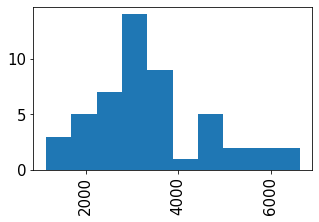

In [9]:
ThresoldCompArray=[]
for i in range(0,24):
    ThresoldComp=Thresold[time[i]]
    ThresoldCompArray.append(ThresoldComp)
#print(ThresoldCompArray)
import numpy as np  
SumThresold=np.sum(ThresoldCompArray)
print(SumThresold)
IntegrationScen=[]
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    IntegrationScen.append(np.sum(ScenArray))
#print(IntegrationScen)
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
ax.hist(IntegrationScen, bins=10)
plt.xticks(rotation=90)
sum(i > SumThresold for i in IntegrationScen)

Text(0, 0.5, 'Generation cost')

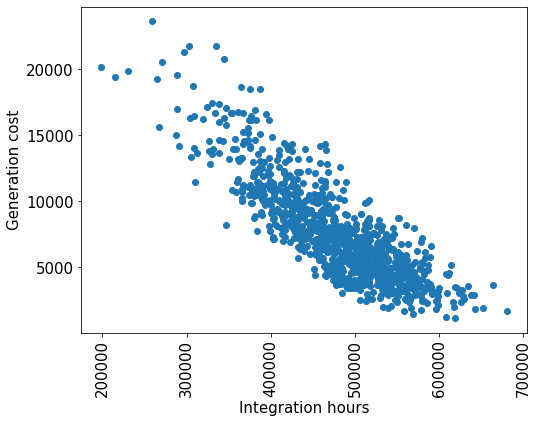

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(8,6))
ax.tick_params(labelsize=15)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    IntegrationScen.append(a)
    ExtScenIdx.append(k)
    #plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
#plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
#print(IntegrationScen)
NumExtScen=sum(i > SumThresold for i in IntegrationScen)
#print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
plt.scatter(HighGenCost,IntegrationScen)
#ax.hist(GenerationCostAll)
#ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)
ax.set_xlabel("Integration hours",fontsize=15)
ax.set_ylabel("Generation cost",fontsize=15)

[]


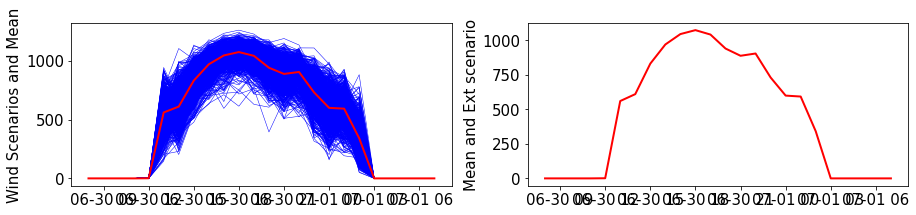

In [11]:
DifferenceLoadWindSolar=SolarScenarios
MeanDiff=mean(DifferenceLoadWindSolar)
import matplotlib.pyplot as plt
import numpy as np
import math
Thresold=MeanDiff
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,2,1)
ax.tick_params(labelsize=15)
ax.set_ylabel("Wind Scenarios and Mean",fontsize=15)
plt.plot(DifferenceLoadWindSolar.T,'b', label='Difference', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

index=[]
time=WindScenarios.keys()
ax = fig.add_subplot(1,2,2)
ax.tick_params(labelsize=15)
ax.set_ylabel("Mean and Ext scenario",fontsize=15)
for k in range(0,1000):
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    check=(ScenArray-Thresold)
    CheckArray=[]
    for t in range(0,24):
        CheckArray.append(check[time[t]])
    if(all(x > 0 for x in CheckArray)):
        plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
        index.append(k)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
print(index)
plt.show()

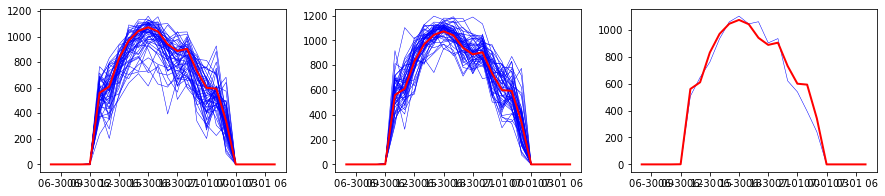

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(1,3,1)
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

ax = fig.add_subplot(1,3,2)
for k in sort_index_curAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

LoadShedSortedAll=[]
for i in range(0,1000):
    a=LoadSheddingAll[i]
    LoadShedSortedAll.append(a)
LoadShedSortedAll=np.nonzero(LoadShedSortedAll)

ax = fig.add_subplot(1,3,3)
for k in LoadShedSortedAll:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
plt.plot(Thresold.T,'r', label='Average Difference', lw=2)

11120.5729584


10

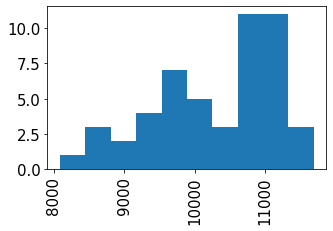

In [13]:
ThresoldCompArray=[]
for i in range(0,24):
    ThresoldComp=Thresold[time[i]]
    ThresoldCompArray.append(ThresoldComp)
#print(ThresoldCompArray)
import numpy as np  
SumThresold=np.sum(ThresoldCompArray)
print(SumThresold)
IntegrationScen=[]
for k in sort_indexGenCostAll[950:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    IntegrationScen.append(np.sum(ScenArray))
#print(IntegrationScen)
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
ax.hist(IntegrationScen, bins=10)
plt.xticks(rotation=90)
sum(i > SumThresold for i in IntegrationScen)

Text(0, 0.5, 'Generation cost')

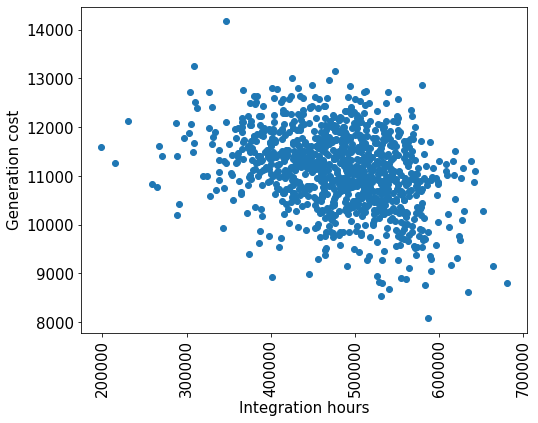

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
fig = plt.figure(figsize=(8,6))
ax.tick_params(labelsize=15)
IntegrationScen=[]
ExtScenIdx=[]
for k in sort_indexGenCostAll[0:1000]:
    ScenArray=[]
    for i in range(0,24):
        scen=DifferenceLoadWindSolar[time[i]][k]
        ScenArray.append(scen)
    a=np.sum(ScenArray)
    IntegrationScen.append(a)
    ExtScenIdx.append(k)
    #plt.plot(time,ScenArray,'b', label='Scenario', lw=0.5)
#plt.plot(Thresold.T,'r', label='Average Difference', lw=2)
#print(IntegrationScen)
NumExtScen=sum(i > SumThresold for i in IntegrationScen)
#print(NumExtScen)
HighGenCost=[]
for i in ExtScenIdx:
    HighGenCost.append(GenCostSortedAll[i])
#print("The higher generation cost are:", HighGenCost)

ax = fig.add_subplot(1,1,1)
ax.tick_params(labelsize=15)
plt.scatter(HighGenCost,IntegrationScen)
#ax.hist(GenerationCostAll)
#ax.hist(HighGenCost, bins=10,color = "red")
plt.xticks(rotation=90)
ax.set_xlabel("Integration hours",fontsize=15)
ax.set_ylabel("Generation cost",fontsize=15)